In [60]:
import sklearn
# import sklearn_pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn_pandas import DataFrameMapper

In [74]:
dtype = {'label':object, 'weekday':object, 'clickTime':object, 'creativeID':object, 'userID':object,'positionID':object, 'connectionType':object,
       'telecomsOperator':object, 'age':object, 'gender':object, 'education':object, 'marriageStatus':object,
       'haveBaby':object, 'hometown':object, 'residence':object, 'sitesetID':object, 'positionType':object,
       'adID':object, 'camgaignID':object, 'advertiserID':object, 'appID':object, 'appPlatform':object,
       'appCategory':object}
# train = pd.read_csv('../../data/train.csv', nrows=1000, dtype=dtype)
train = pd.read_csv('../../data/train.csv', dtype=dtype)

In [75]:
train.head()

,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,age,gender,education,...,hometown,residence,sitesetID,positionType,adID,camgaignID,advertiserID,appID,appPlatform,appCategory
0,0,170000,3089,2798058,293,1,1,5,2,1,...,0,1301,0,3,1321,83,10,434,1,108
1,0,170000,1259,463234,6161,1,2,4,2,1,...,0,213,0,1,1535,685,80,14,2,2
2,0,170000,4465,1857485,7434,4,1,3,1,1,...,0,1502,0,1,147,460,3,465,1,209
3,0,170000,1004,2038823,977,1,1,0,0,0,...,0,1001,0,1,411,564,3,465,1,209
4,0,170000,1887,2015141,3688,1,1,7,1,2,...,1001,1001,0,1,369,144,84,360,1,201


In [78]:
df = train[train['userID']=='2676800']

In [79]:
df.head(50)

,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,age,gender,education,...,hometown,residence,sitesetID,positionType,adID,camgaignID,advertiserID,appID,appPlatform,appCategory
1425014,1,230718,3916,2676800,6315,1,3,3,2,2,...,107,102,0,1,1798,569,54,389,1,108
1439094,1,230822,6342,2676800,1153,1,3,3,2,2,...,107,102,0,1,549,569,54,389,1,108
1471695,1,231101,6239,2676800,6005,1,3,3,2,2,...,107,102,0,3,3384,569,54,389,1,108
1498434,1,231245,542,2676800,6315,1,1,3,2,2,...,107,102,0,1,868,569,54,389,1,108
1517655,1,231404,6342,2676800,6315,1,1,3,2,2,...,107,102,0,1,549,569,54,389,1,108
1584731,0,231854,6239,2676800,6005,1,3,3,2,2,...,107,102,0,3,3384,569,54,389,1,108
1640756,0,232154,1004,2676800,3365,1,3,3,2,2,...,107,102,0,1,411,564,3,465,1,209
1779025,1,241336,3489,2676800,1848,1,1,3,2,2,...,107,102,0,1,1583,569,54,389,1,108
1812376,1,241606,350,2676800,1153,1,1,3,2,2,...,107,102,0,1,1573,569,54,389,1,108
1871756,1,241940,5598,2676800,6005,1,1,3,2,2,...,107,102,0,3,3384,569,54,389,1,108


In [29]:
len(train)

3692105

In [30]:
train.columns

Index(['label', 'clickTime', 'creativeID', 'userID', 'positionID',
       'connectionType', 'telecomsOperator', 'age', 'gender', 'education',
       'marriageStatus', 'haveBaby', 'hometown', 'residence', 'sitesetID',
       'positionType', 'adID', 'camgaignID', 'advertiserID', 'appID',
       'appPlatform', 'appCategory'],
      dtype='object')

In [31]:
# train.count()

In [32]:
# train.dtypes

In [67]:
def time_transform(series):
    return str(series)[2:4]
train['clickTime'] = train['clickTime'].apply(time_transform)

In [68]:
# 统计分类变量信息
train.describe()

,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,age,gender,education,...,hometown,residence,sitesetID,positionType,adID,camgaignID,advertiserID,appID,appPlatform,appCategory
count,3692105,3692105,3692105,3692105,3692105,3692105,3692105,3692105,3692105,3692105,...,3692105,3692105,3692105,3692105,3692105,3692105,3692105,3692105,3692105,3692105
unique,2,24,6315,2595627,7219,5,4,17,3,8,...,365,399,3,6,3447,677,89,50,2,14
top,0,20,4565,1884671,2579,1,1,3,1,0,...,0,0,0,1,3593,632,3,465,1,209
freq,3598844,249822,449067,113,343192,2947725,2063478,782006,1784347,988589,...,1361278,344859,2676944,2449547,596200,596200,1915847,1915847,2887030,1915847


In [10]:
# 统计数值变量信息
# train.describe(include=['number'])

In [39]:
train.drop('userID', axis=1, inplace=True)

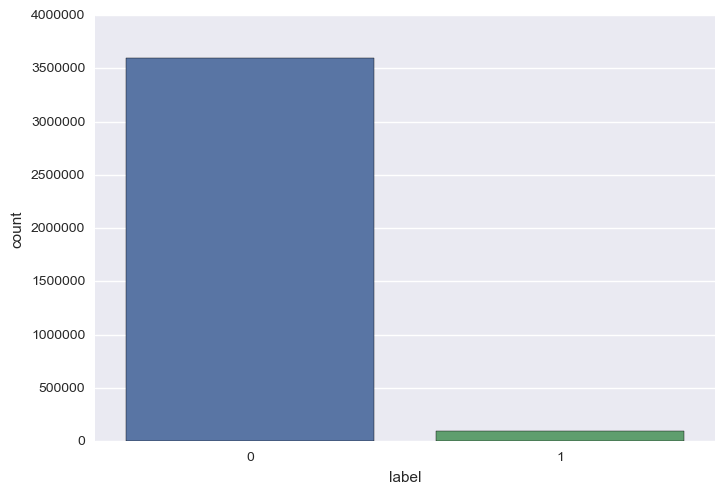

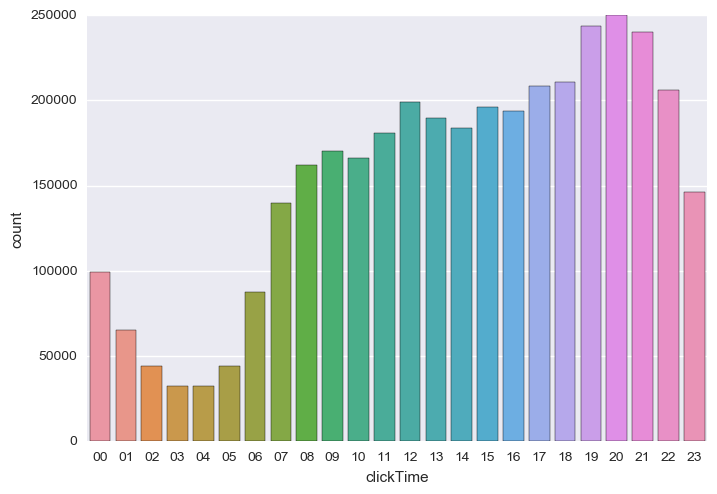

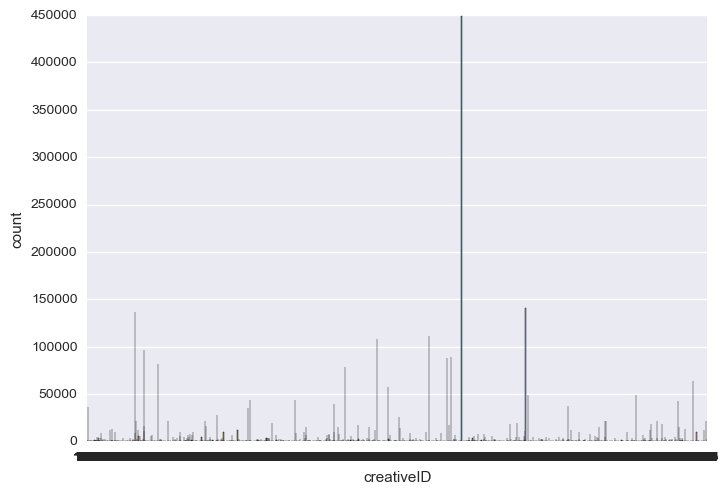

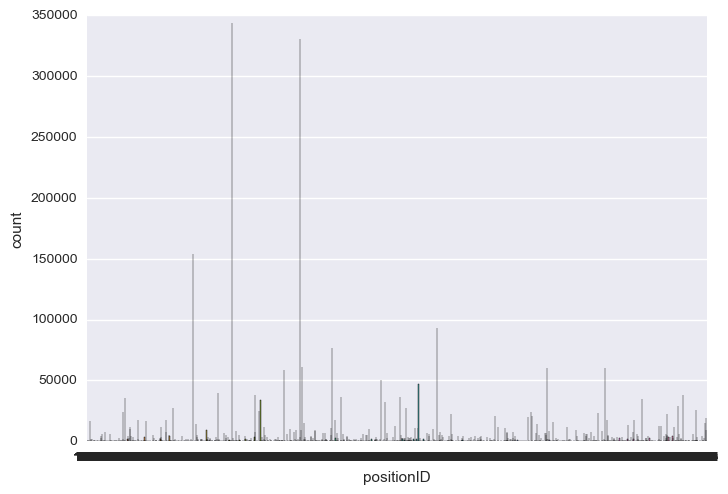

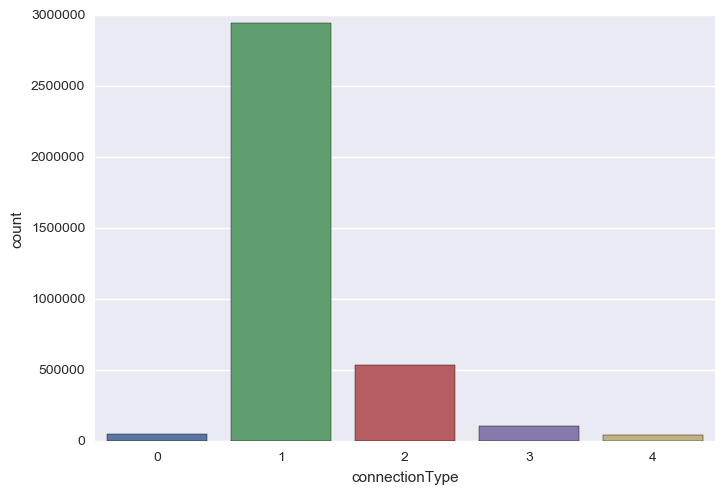

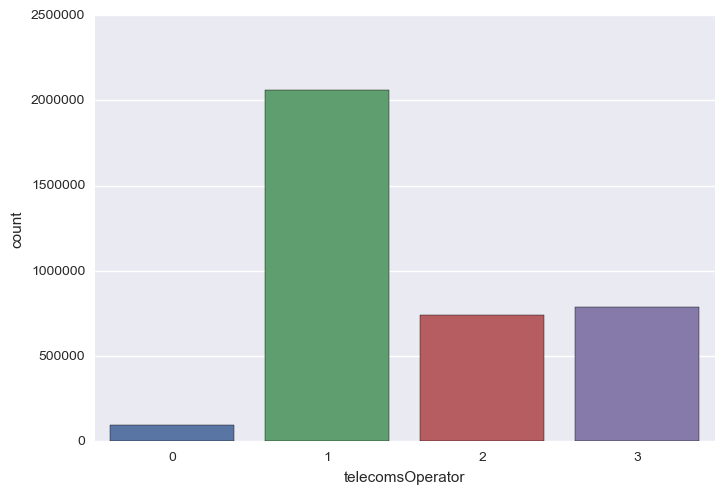

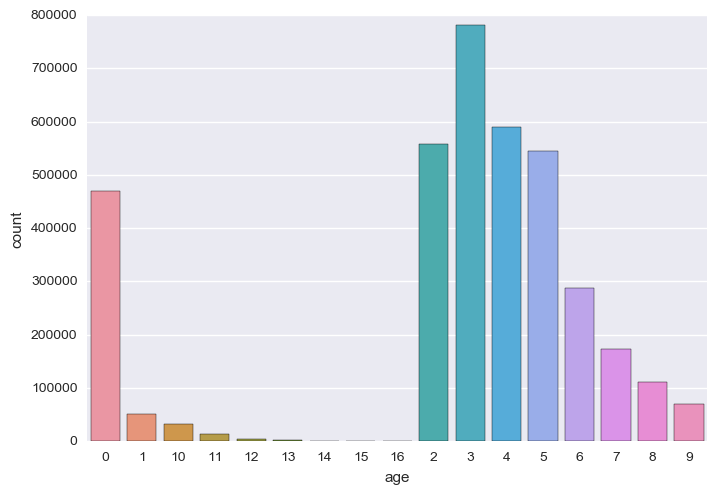

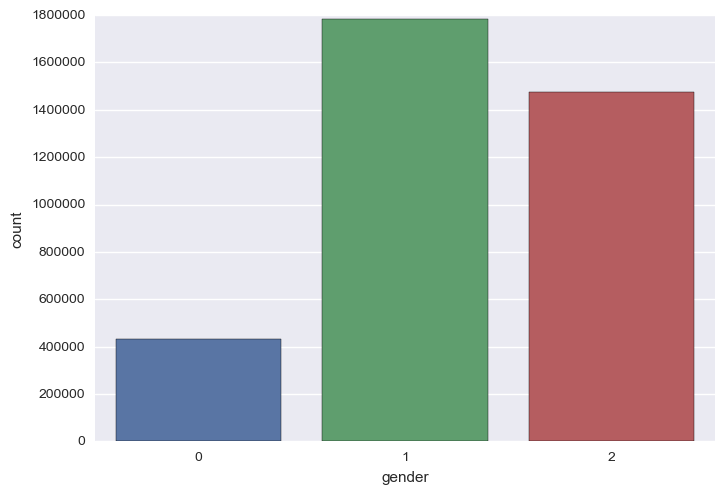

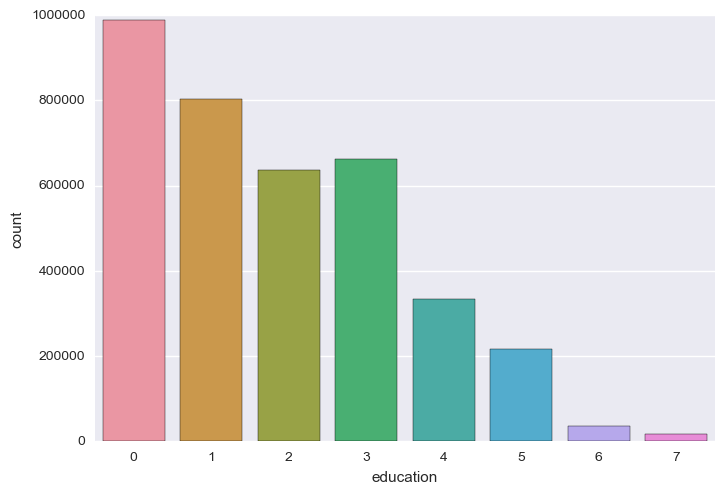

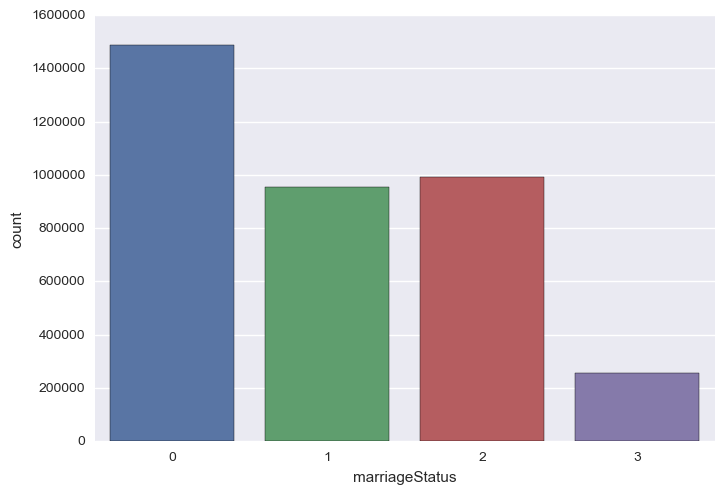

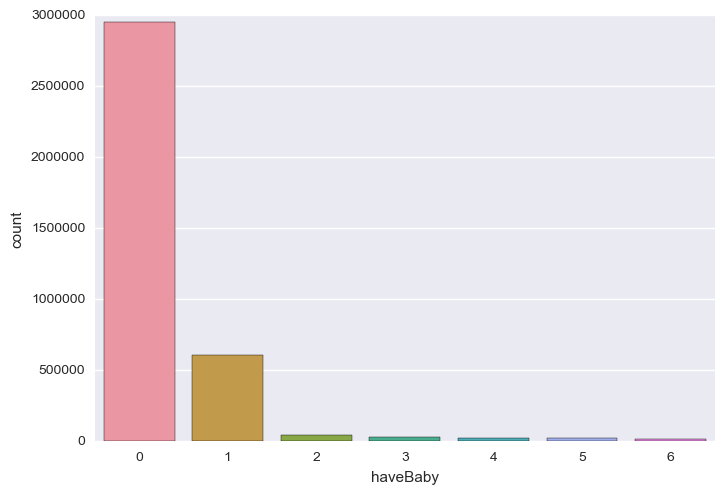

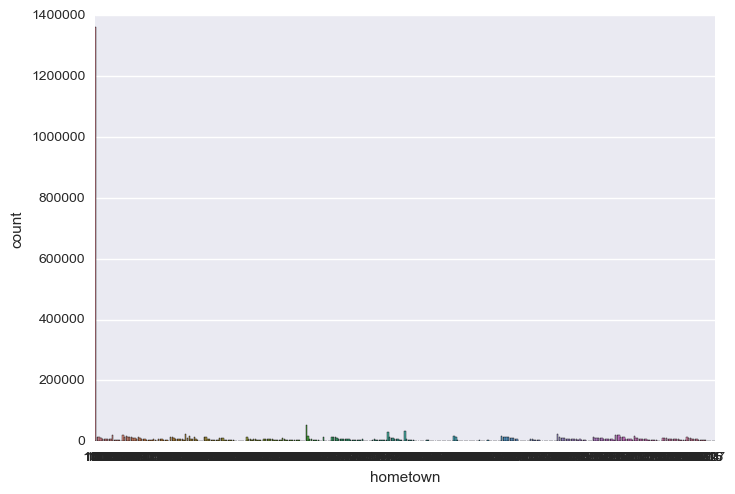

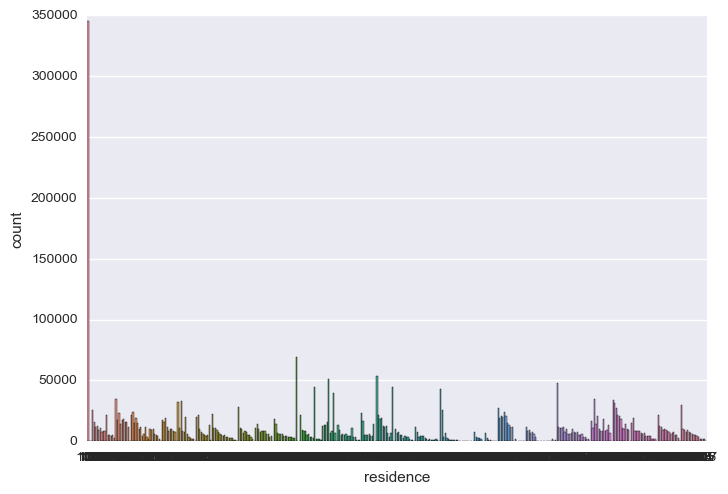

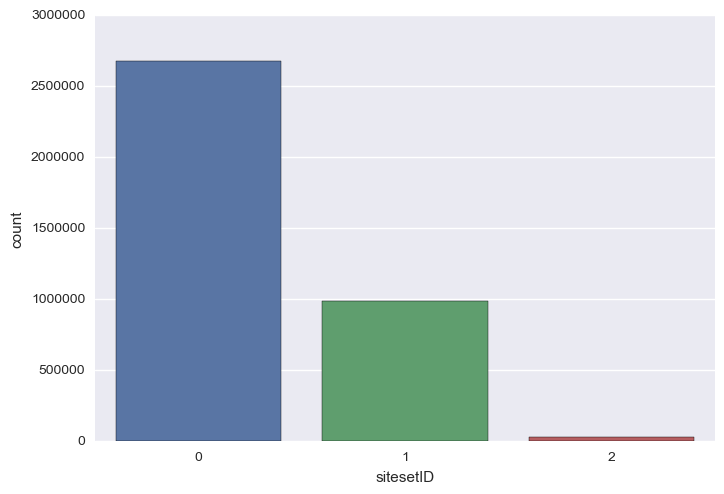

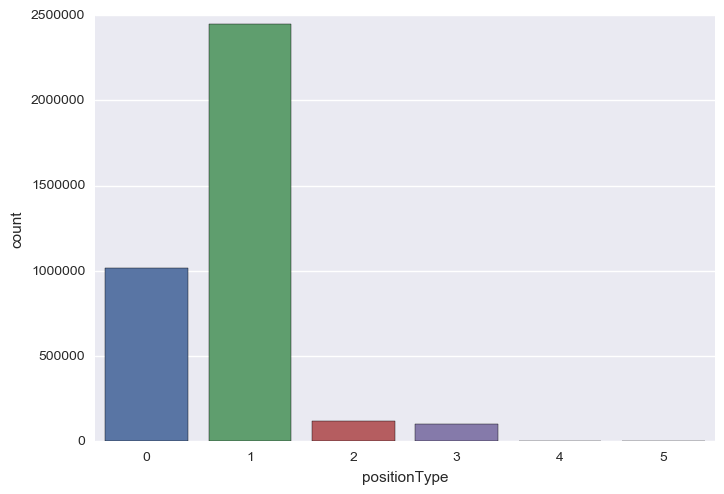

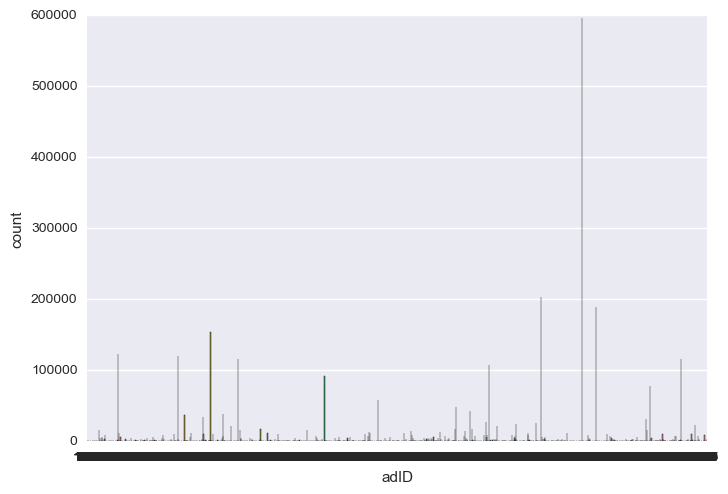

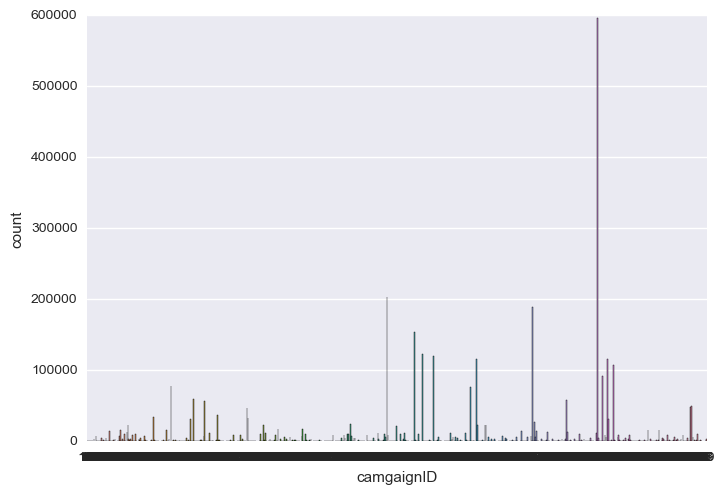

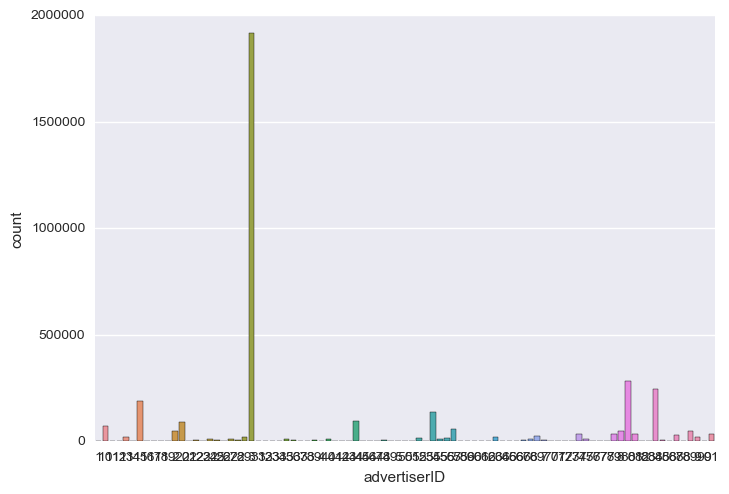

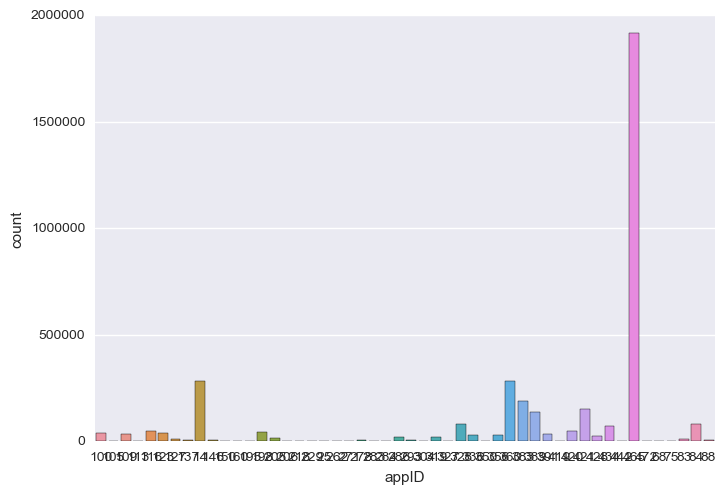

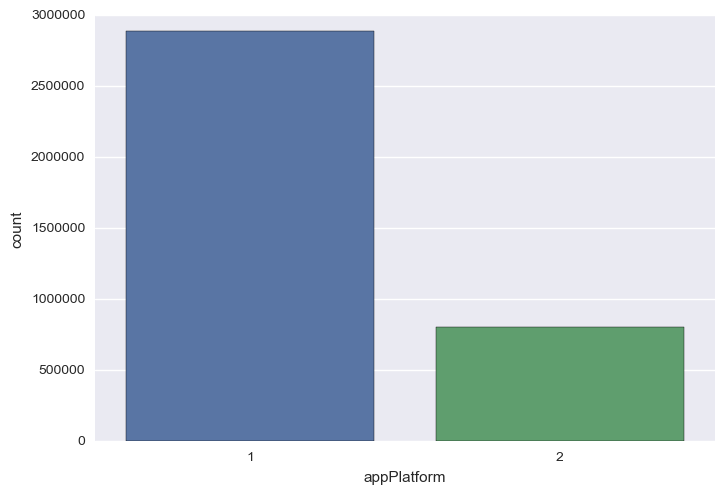

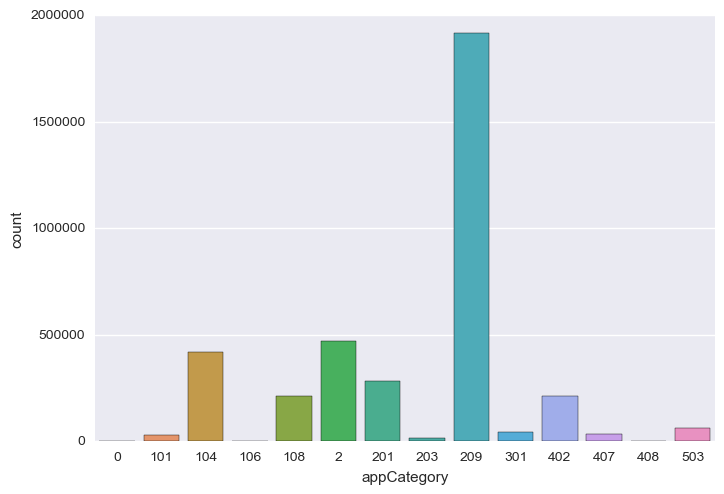

In [12]:
# 画图查看分类变量的分布

categorical_feature = train.dtypes[train.dtypes == 'object'].index
for feature in categorical_feature:
    sns.countplot(x=train[feature], data=train)
    plt.show()

In [69]:
cnv_data = train[train['label']=='1']

In [70]:
cnv_data.head()

,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,age,gender,education,...,hometown,residence,sitesetID,positionType,adID,camgaignID,advertiserID,appID,appPlatform,appCategory
145,1,00,2137,703736,2579,1,1,5,1,1,...,415,415,1,0,2148,179,84,360,1,201
147,1,00,3981,2030308,2579,2,1,4,2,1,...,0,1503,1,0,2924,513,44,421,1,104
187,1,00,3584,936876,3322,2,3,3,1,4,...,903,903,1,0,1349,32,8,84,2,402
191,1,00,2137,2619571,2579,1,2,4,1,2,...,1003,201,1,0,2148,179,84,360,1,201
247,1,00,2137,1411484,2579,1,2,4,1,3,...,506,506,1,0,2148,179,84,360,1,201


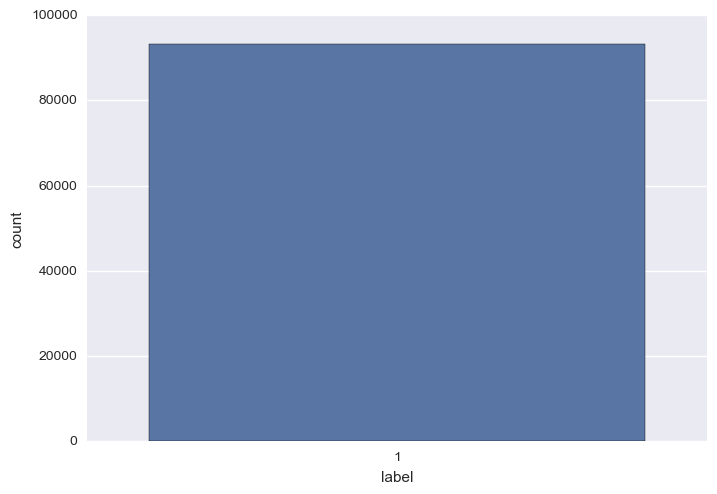

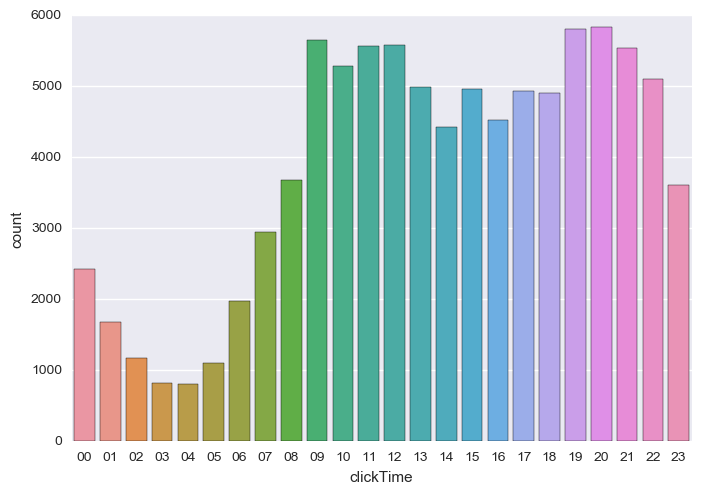

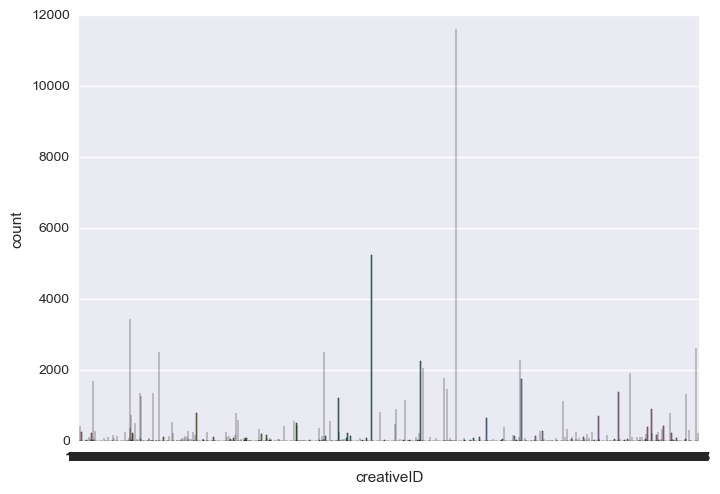

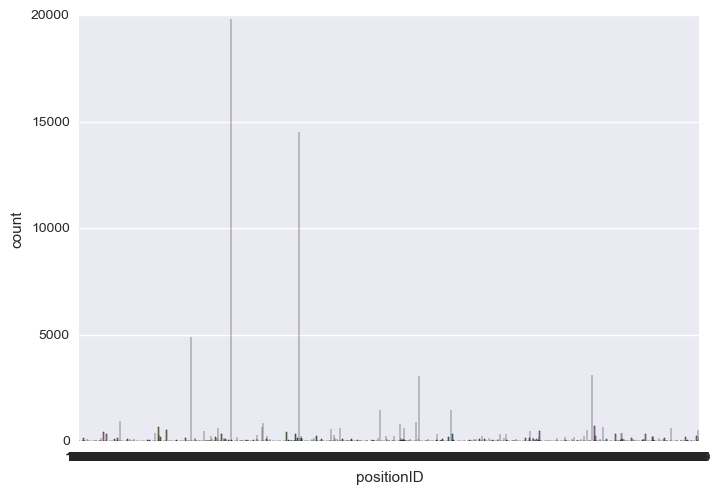

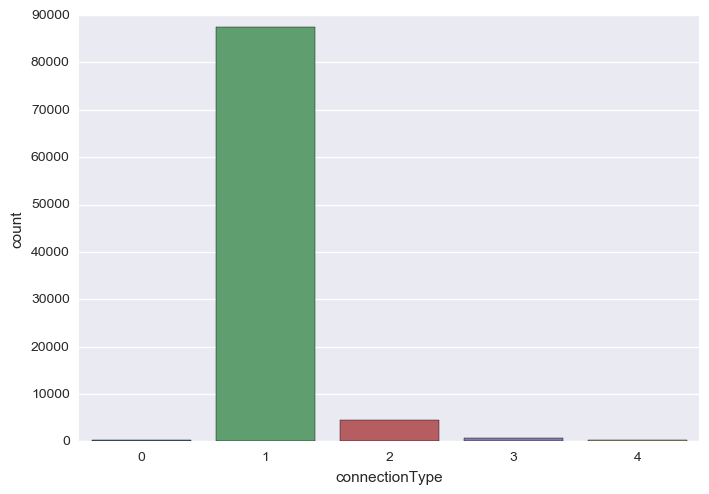

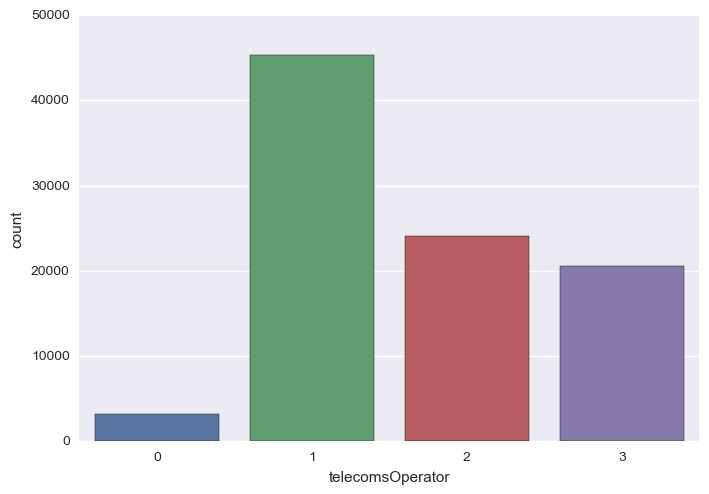

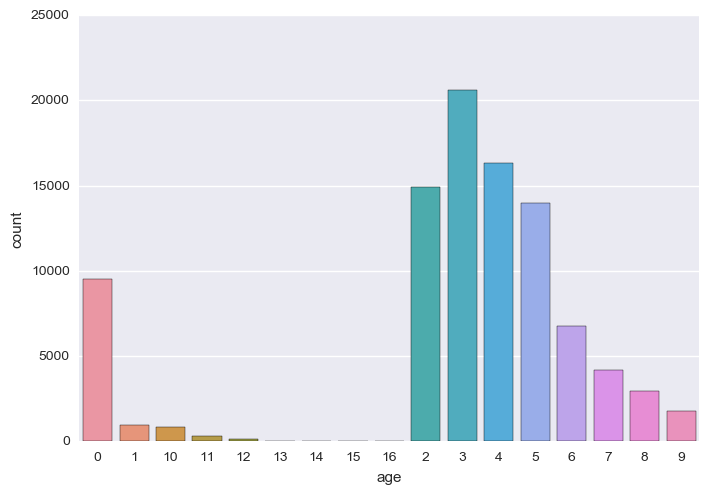

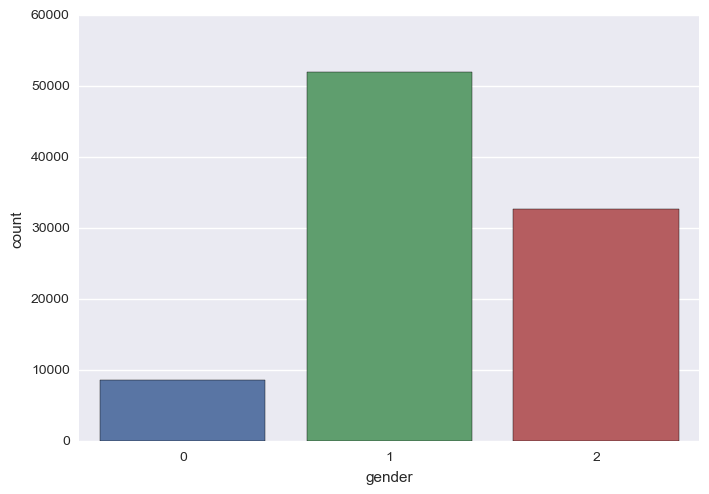

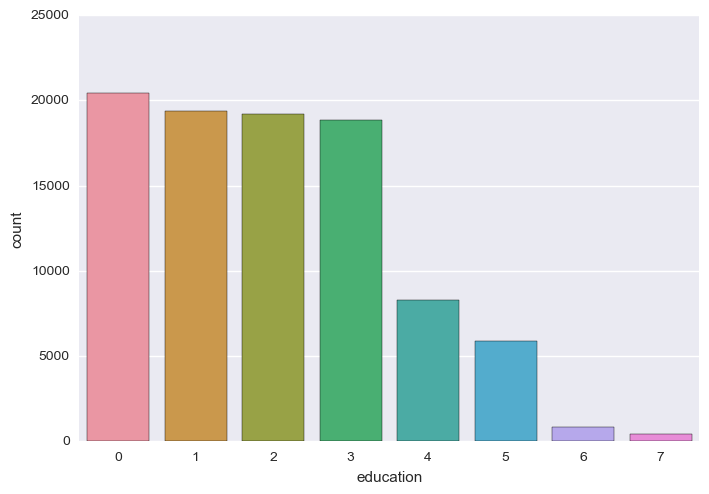

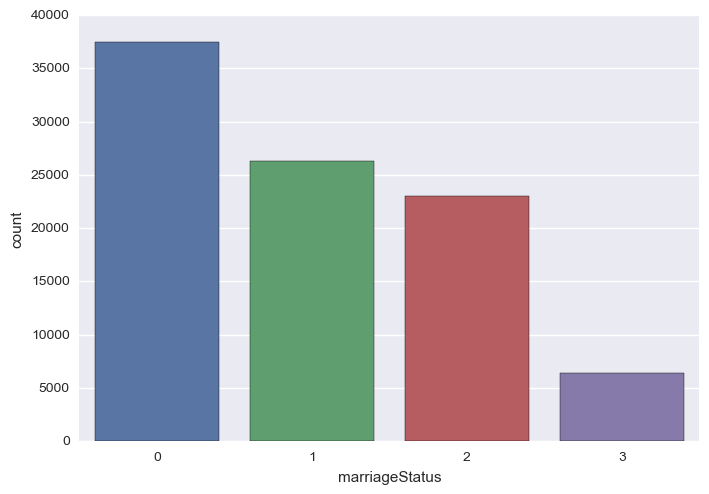

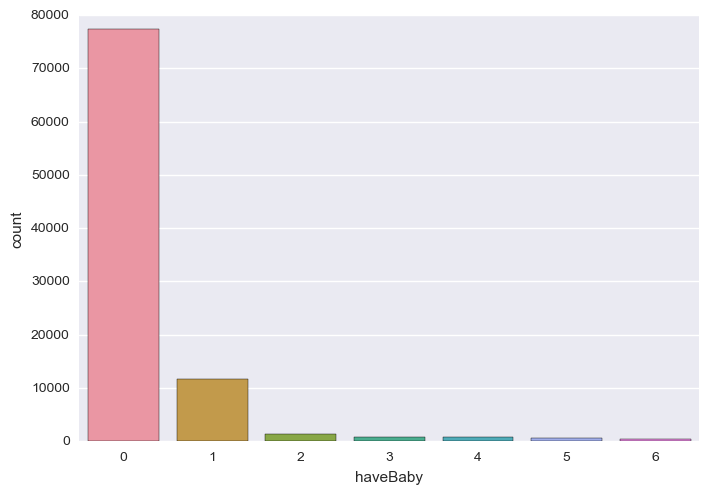

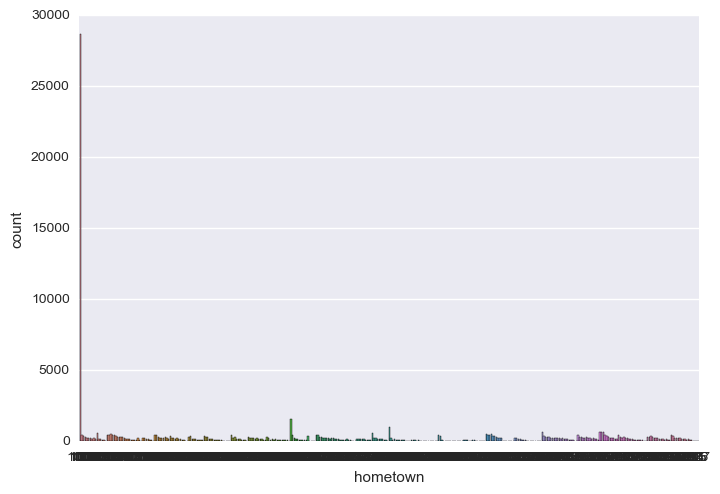

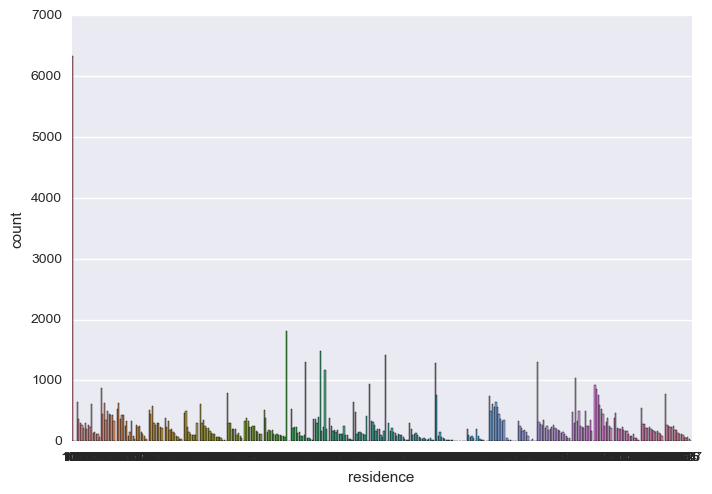

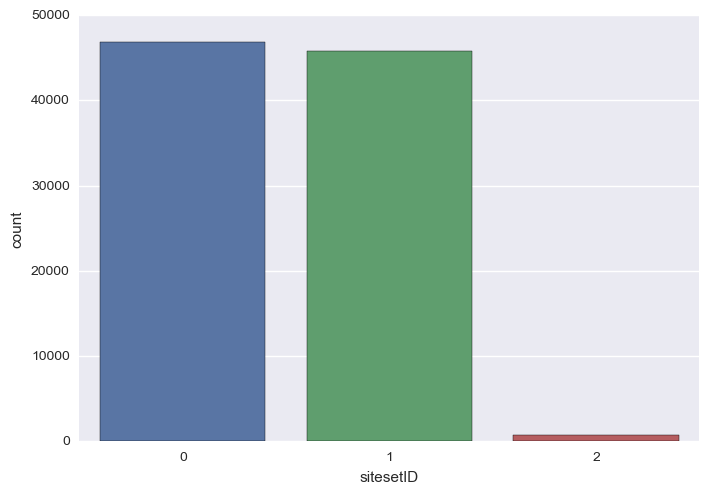

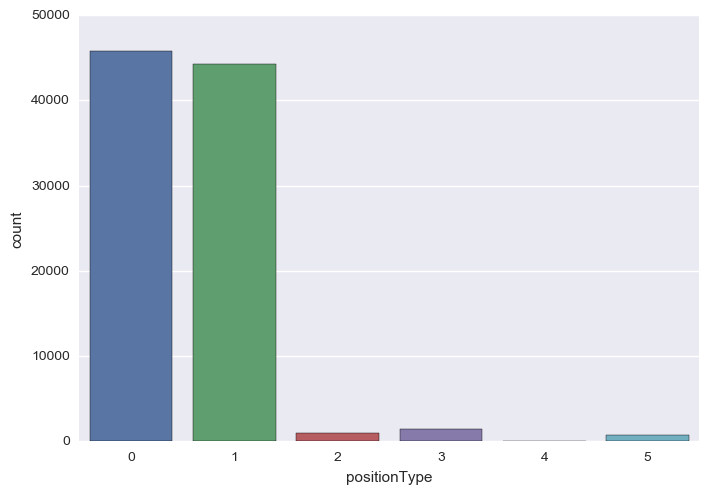

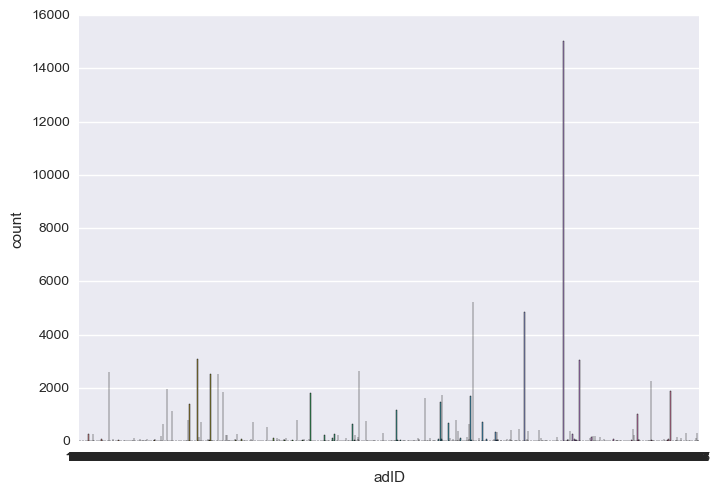

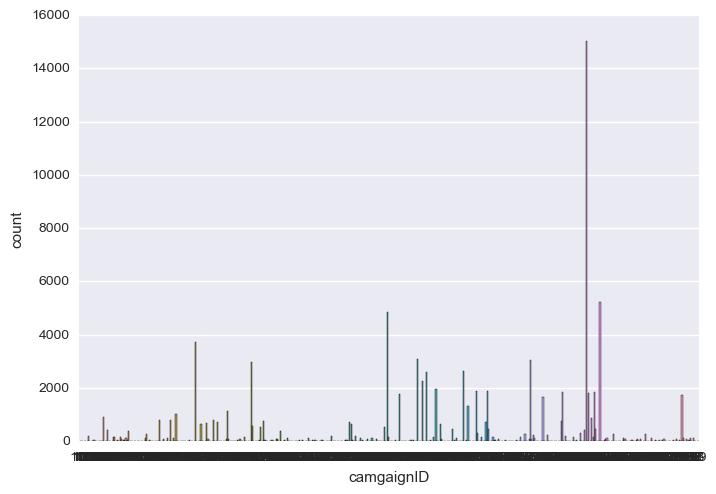

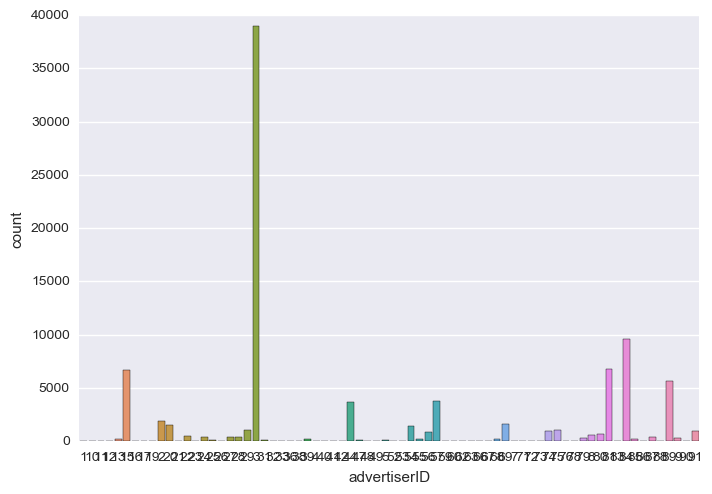

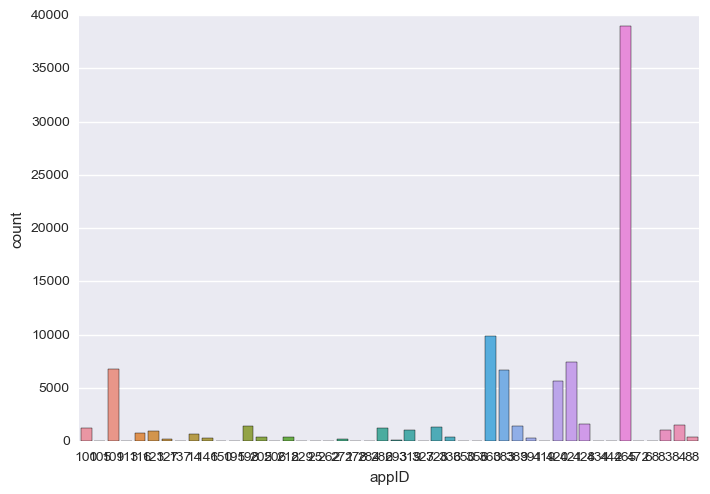

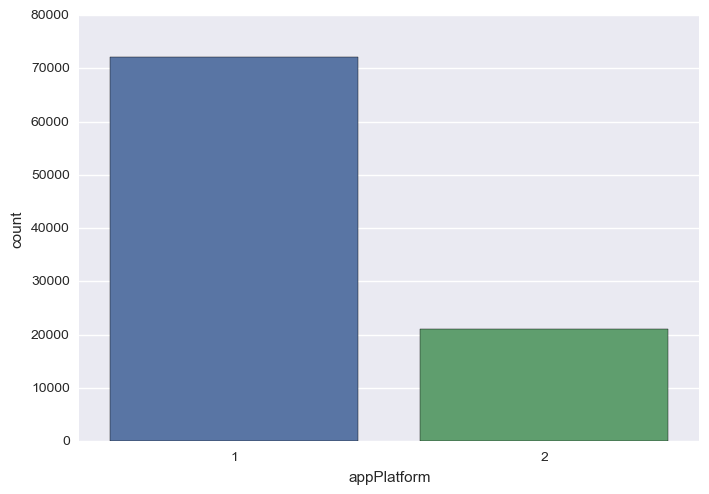

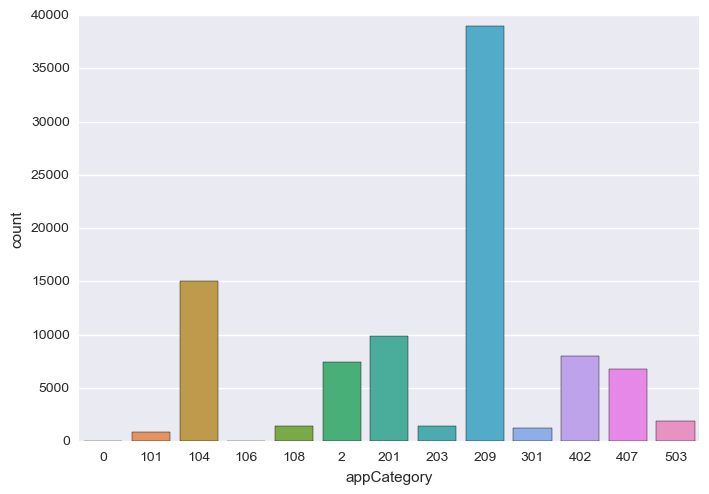

In [19]:
# 画图查看分类变量的分布

categorical_feature = cnv_data.dtypes[cnv_data.dtypes == 'object'].index
for feature in categorical_feature:
    sns.countplot(x=cnv_data[feature], data=cnv_data)
    plt.show()

In [71]:
cnv_data.describe()

,label,clickTime,creativeID,userID,positionID,connectionType,telecomsOperator,age,gender,education,...,hometown,residence,sitesetID,positionType,adID,camgaignID,advertiserID,appID,appPlatform,appCategory
count,93261,93261,93261,93261,93261,93261,93261,93261,93261,93261,...,93261,93261,93261,93261,93261,93261,93261,93261,93261,93261
unique,1,24,1981,92051,1746,5,4,17,3,8,...,365,388,3,6,1467,446,72,46,2,13
top,1,20,4565,2676800,2579,1,1,3,1,0,...,0,0,0,0,3593,632,3,465,1,209
freq,93261,5826,11622,11,19825,87555,45370,20597,51955,20445,...,28655,6327,46833,45740,15023,15023,38962,38962,72124,38962
